In [1]:
from keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Creating the data
series = np.sin((0.1 * np.arange(400)) ** 2)

This is a series of the form:

$$x(t) = sin(\omega t^2)$$


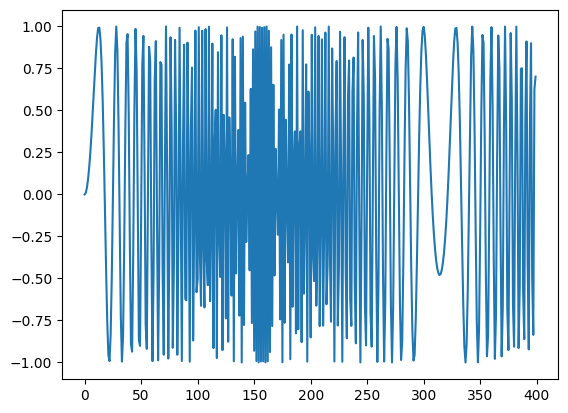

In [3]:
# Plotting the series
plt.plot(series)
plt.show()

In [4]:
# Building the dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t : t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)

N = len(X)

print(f'X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (390, 10) Y.shape (390,)


In [5]:
# Creating autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

r = model.fit(
    X[: -N // 2],
    Y[: -N // 2],
    epochs=80,
    validation_data=(
        X[-N // 2 :],
        Y[-N // 2 :],
    ),
)

Epoch 1/80
7/7 [==============================] - 0s 8ms/step - loss: 1.3520 - val_loss: 1.5751
Epoch 2/80
7/7 [==============================] - 0s 2ms/step - loss: 1.1493 - val_loss: 1.4041
Epoch 3/80
7/7 [==============================] - 0s 2ms/step - loss: 0.9917 - val_loss: 1.2479
Epoch 4/80
7/7 [==============================] - 0s 2ms/step - loss: 0.8615 - val_loss: 1.1170
Epoch 5/80
7/7 [==============================] - 0s 2ms/step - loss: 0.7597 - val_loss: 1.0111
Epoch 6/80
7/7 [==============================] - 0s 2ms/step - loss: 0.6908 - val_loss: 0.9266
Epoch 7/80
7/7 [==============================] - 0s 2ms/step - loss: 0.6325 - val_loss: 0.8567
Epoch 8/80
7/7 [==============================] - 0s 2ms/step - loss: 0.5931 - val_loss: 0.8028
Epoch 9/80
7/7 [==============================] - 0s 2ms/step - loss: 0.5618 - val_loss: 0.7598
Epoch 10/80
7/7 [==============================] - 0s 2ms/step - loss: 0.5393 - val_loss: 0.7267
Epoch 11/80
7/7 [======================

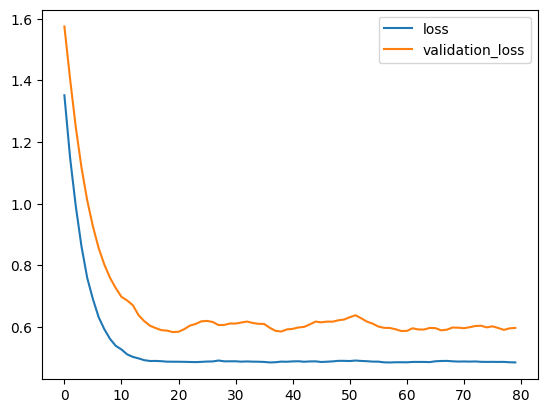

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [7]:
# Using model to forecast
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

13/13 [==============================] - 0s 313us/step
(390, 1)


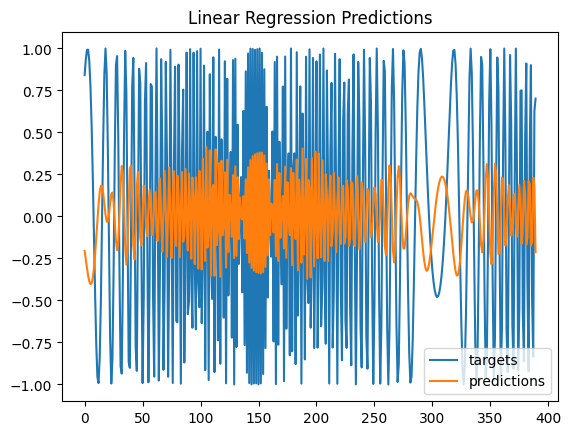

In [8]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 6ms/step


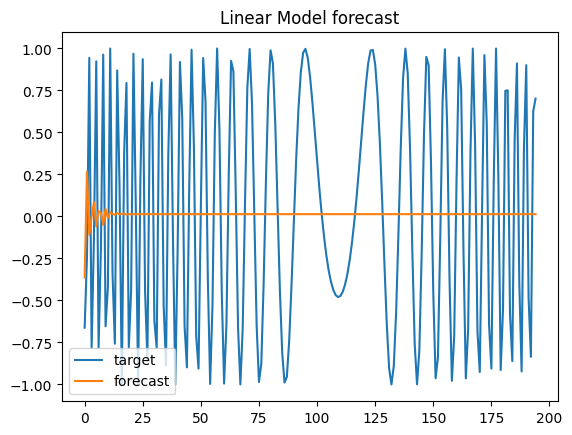

In [9]:
# Multi-step forecast
forecast = []
input_ = X[-N // 2]

while len(forecast) < len(Y[-N // 2 :]):
    # Reshaping the input
    f = model.predict(input_.reshape(1, -1))[0, 0]
    forecast.append(f)

    input_ = np.roll(input_, -1)
    input_[-1] = f

plt.plot(Y[-N // 2 :], label='target')
plt.plot(forecast, label='forecast')
plt.title('Linear Model forecast')
plt.legend()
plt.show()

In [10]:
# Trying to use RNN/LSTM
X = X.reshape(-1, T, 1)  # -1 is used to imply the size, whatever that may be

# Creating the RNN
i = Input(shape=(T, D))
# x = SimpleRNN(10)(i)
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
)

r = model.fit(
    X[: -N // 2],
    Y[: -N // 2],
    epochs=200,
    validation_data=(
        X[-N // 2 :],
        Y[-N // 2 :],
    ),
)

Epoch 1/200
7/7 [==============================] - 1s 27ms/step - loss: 0.5290 - val_loss: 0.5011
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.5122 - val_loss: 0.5131
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 0.5040 - val_loss: 0.5184
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4930 - val_loss: 0.5098
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4838 - val_loss: 0.5266
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4688 - val_loss: 0.5444
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4471 - val_loss: 0.5347
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4398 - val_loss: 0.5572
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4141 - val_loss: 0.5740
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 0.3885 - val_loss: 0.5843
Epoch 11/200
7/7 [==========

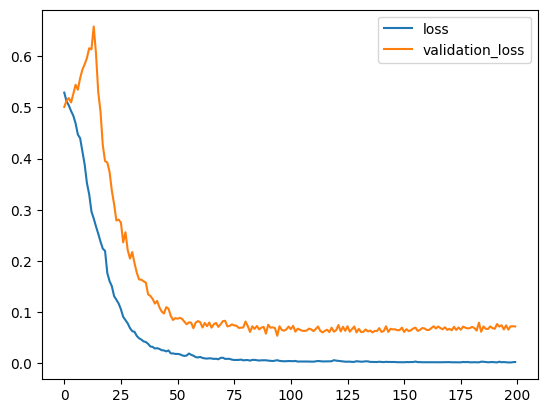

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

In [12]:
# Using model to forecast
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

13/13 [==============================] - 0s 665us/step
(390, 1)


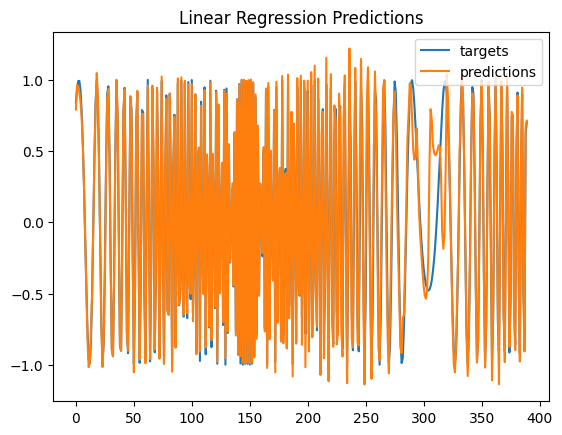

In [13]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 8ms/step


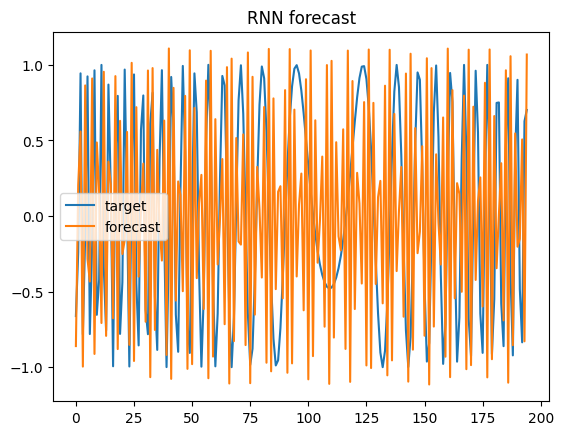

In [14]:
# Multi-step forecast
forecast = []
input_ = X[-N // 2]

while len(forecast) < len(Y[-N // 2 :]):
    # Reshaping the input
    f = model.predict(input_.reshape(1, T, 1))[0, 0]
    forecast.append(f)

    input_ = np.roll(input_, -1)
    input_[-1] = f

plt.plot(Y[-N // 2 :], label='target')
plt.plot(forecast, label='forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()